In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sbn
from datetime import date

In [2]:
listings_df =pd.read_csv('~/Downloads/2018 DA Take Home Challenge/listings.csv')
contacts_df =pd.read_csv('~/Downloads/2018 DA Take Home Challenge/contacts.csv')
users_df = pd.read_csv('~/Downloads/2018 DA Take Home Challenge/users.csv')

In [3]:
combined_df =contacts_df.merge(listings_df, left_on ='id_listing_anon', right_on='id_listing_anon')
combined_df2 =combined_df.merge(users_df, left_on ='id_guest_anon', right_on='id_user_anon')
combined_df3 = combined_df2.copy()
combined_df3.ts_booking_at = combined_df3.ts_booking_at.fillna(0)
combined_df3.ts_booking_at = combined_df3.ts_booking_at.apply(lambda x: 0 if x==0 else 1)
combined_df3["m_guests"] = combined_df3["m_guests"].fillna(2)
combined_df3['booked'] = combined_df3.ts_booking_at.apply(lambda x: True if x == 1 else False)

In [4]:
combined_df3['ts_interaction_first'] = pd.to_datetime(combined_df3['ts_interaction_first'],infer_datetime_format=True)
combined_df3['ds_checkin_first'] = pd.to_datetime(combined_df3['ds_checkin_first'],infer_datetime_format=True)

combined_df3['date_interaction_first'] = pd.to_datetime(combined_df3['ts_interaction_first'].dt.date)
combined_df3['delta_days'] = combined_df3.ds_checkin_first - combined_df3.date_interaction_first
combined_df3['delta_days'] = pd.to_numeric(combined_df3['delta_days'].dt.days, downcast='integer')
combined_df3['booked'] = combined_df3.ts_booking_at.apply(lambda x: True if x == 1 else False)
d1 =  {
    '-unknown-':'new'}
combined_df3['guest_user_stage_first'].replace(d1, inplace= True)

In [5]:
combined_df3.head()

,id_guest_anon,id_host_anon,id_listing_anon,ts_interaction_first,ts_reply_at_first,ts_accepted_at_first,ts_booking_at,ds_checkin_first,ds_checkout_first,m_guests,...,guest_user_stage_first,room_type,listing_neighborhood,total_reviews,id_user_anon,country,words_in_user_profile,booked,date_interaction_first,delta_days
0,da8656a1-51af-4f38-b1c4-94be1f585157,5426897d-960d-4013-9e38-606ae746793c,a408a8b2-0d44-4513-a611-3736d0409bb2,2016-04-21 02:55:53,2016-04-21 03:15:00.0,2016-04-21 03:15:00.0,1,2016-08-02,2016-08-06,4.0,...,past_booker,Entire home/apt,Copacabana,9.0,da8656a1-51af-4f38-b1c4-94be1f585157,CL,0,True,2016-04-21,103
1,87b4ac3b-3558-4b20-afb0-d5e487eb1b99,5426897d-960d-4013-9e38-606ae746793c,a408a8b2-0d44-4513-a611-3736d0409bb2,2016-05-16 01:44:04,2016-05-16 01:42:54.0,2016-05-16 01:42:54.0,0,2016-07-11,2016-07-25,2.0,...,past_booker,Entire home/apt,Copacabana,9.0,87b4ac3b-3558-4b20-afb0-d5e487eb1b99,UY,39,False,2016-05-16,56
2,8590d6f1-8bc9-4e8b-bdfb-de78f69fcf37,f30417c5-6df4-45ac-bfc2-6ad1cce398ab,e387c705-0aeb-464c-9375-ece63be6f006,2016-02-16 22:14:01,2016-02-16 23:37:36.0,NaN,0,2016-08-11,2016-08-22,5.0,...,past_booker,Entire home/apt,Copacabana,0.0,8590d6f1-8bc9-4e8b-bdfb-de78f69fcf37,FR,0,False,2016-02-16,177
3,ebcd83ba-bda1-47eb-9680-2dd04ccf3988,13cbf50a-3272-45d4-9866-a06b6ea1b99a,d1eb1960-938f-4305-a353-51e224414dd4,2016-01-27 23:33:38,2016-01-28 02:12:47.0,NaN,0,2016-03-14,2016-03-23,1.0,...,new,Private room,Vidigal,49.0,ebcd83ba-bda1-47eb-9680-2dd04ccf3988,AR,0,False,2016-01-27,47
4,3b6d161c-0451-4e71-9896-026e2503dc38,13cbf50a-3272-45d4-9866-a06b6ea1b99a,d1eb1960-938f-4305-a353-51e224414dd4,2016-05-23 12:37:44,2016-05-23 13:12:10.0,NaN,0,2016-06-11,2016-06-17,1.0,...,past_booker,Private room,Vidigal,49.0,3b6d161c-0451-4e71-9896-026e2503dc38,IT,26,False,2016-05-23,19


In [6]:
contact_me_df3= combined_df3[combined_df3['contact_channel_first']=='contact_me']
instant_book_df3= combined_df3[combined_df3['contact_channel_first']=='instant_book']
book_it_df3= combined_df3[combined_df3['contact_channel_first']=='book_it']

In [7]:
contact_me_df3.columns

Index(['id_guest_anon', 'id_host_anon', 'id_listing_anon',
       'ts_interaction_first', 'ts_reply_at_first', 'ts_accepted_at_first',
       'ts_booking_at', 'ds_checkin_first', 'ds_checkout_first', 'm_guests',
       'm_interactions', 'm_first_message_length_in_characters',
       'contact_channel_first', 'guest_user_stage_first', 'room_type',
       'listing_neighborhood', 'total_reviews', 'id_user_anon', 'country',
       'words_in_user_profile', 'booked', 'date_interaction_first',
       'delta_days'],
      dtype='object')

In [8]:
contact_me_df3.contact_channel_first.value_counts()

contact_me    12891
Name: contact_channel_first, dtype: int64

In [9]:
kde_data_contact_me = contact_me_df3[['m_guests', 'm_interactions', 'm_first_message_length_in_characters', 'total_reviews',
       'words_in_user_profile','delta_days' , 'ts_booking_at']]
kde_data_instant_book_df3 = instant_book_df3[['m_guests', 'm_interactions', 'm_first_message_length_in_characters', 'total_reviews',
       'words_in_user_profile','delta_days' , 'ts_booking_at']]
kde_data_book_it_df3 = book_it_df3[['m_guests', 'm_interactions', 'm_first_message_length_in_characters', 'total_reviews',
       'words_in_user_profile','delta_days' , 'ts_booking_at']]

Text(0.5, 0.91, 'KDE Plots for Numerical Predictors')

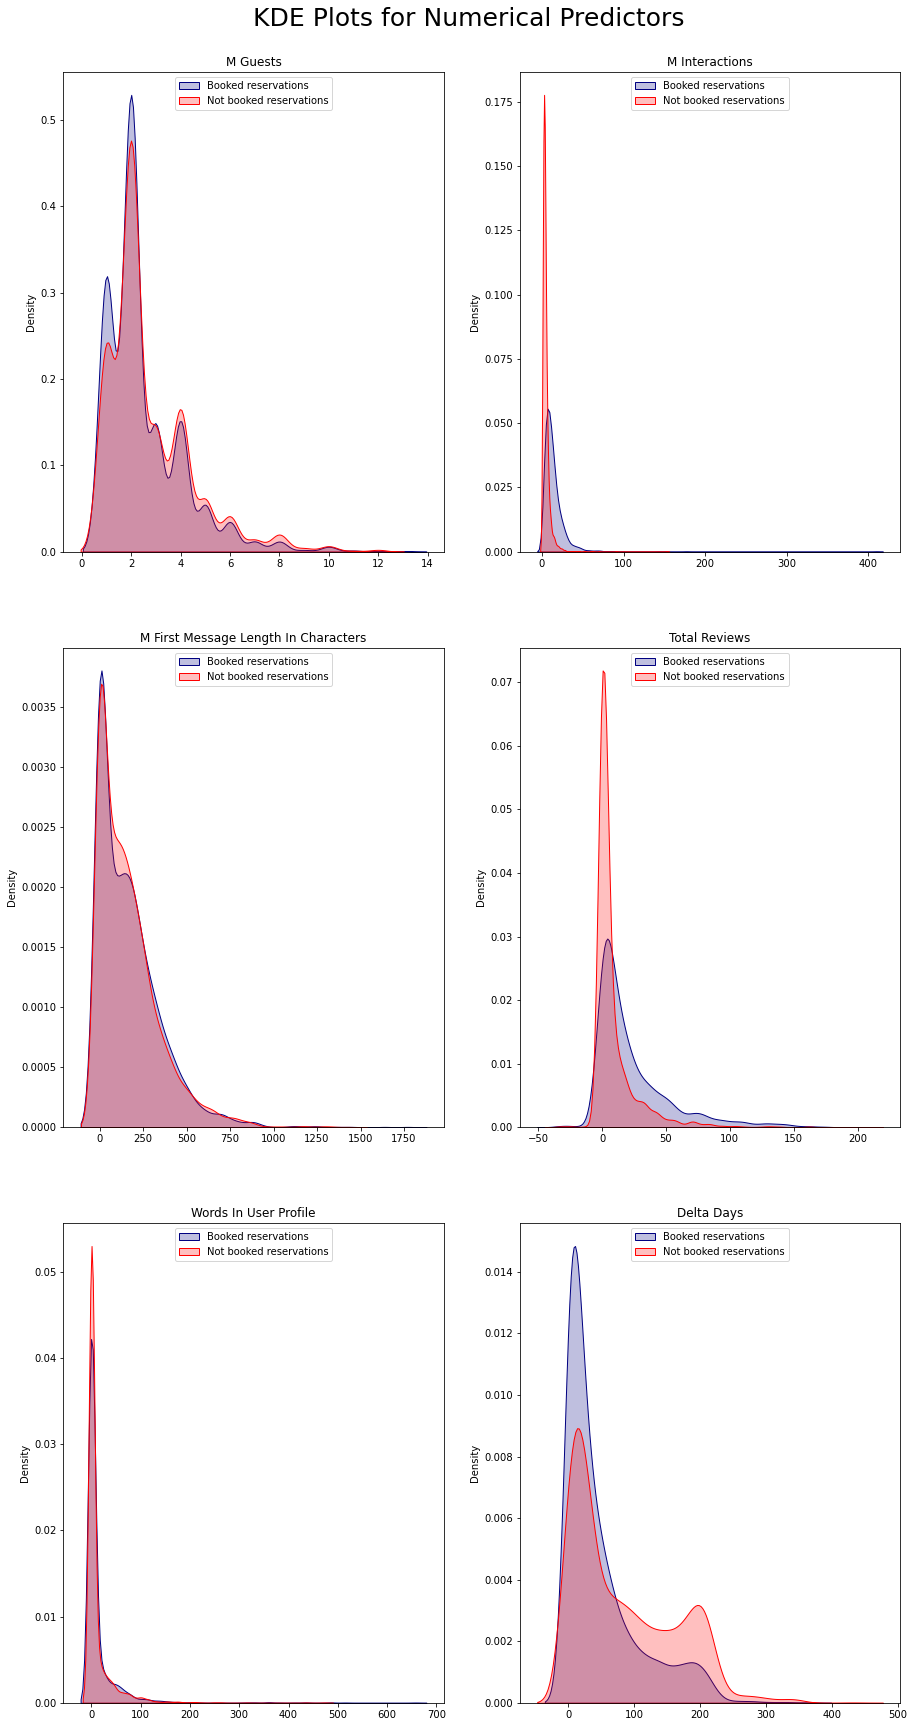

In [10]:
kde_cols = kde_data_book_it_df3.iloc[:,:6].columns.to_list()
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15,30))

for col, ax in zip(kde_cols[:8], axs.flatten()):
    
    booked = kde_data_book_it_df3[kde_data_book_it_df3.ts_booking_at == 1]
    unbooked = kde_data_book_it_df3[kde_data_book_it_df3.ts_booking_at == 0]

    sbn.kdeplot(booked[col], fill=True, bw_method=0.2, color='#000080', label='Booked reservations', ax=ax)
    sbn.kdeplot(unbooked[col], fill=True, bw_method=0.2, color='#FF0000', label='Not booked reservations', ax=ax)
    ax.set_xlabel('')
    ax.set_title(col.replace('_', ' ').title())
#     ax.set_title(col.replace('M', '').title())
    _ = ax.legend(loc='upper center')
    
plt.suptitle("KDE Plots for Numerical Predictors",y=0.91, fontsize=25)

Text(0.5, 0.91, 'KDE Plots for Numerical Predictors')

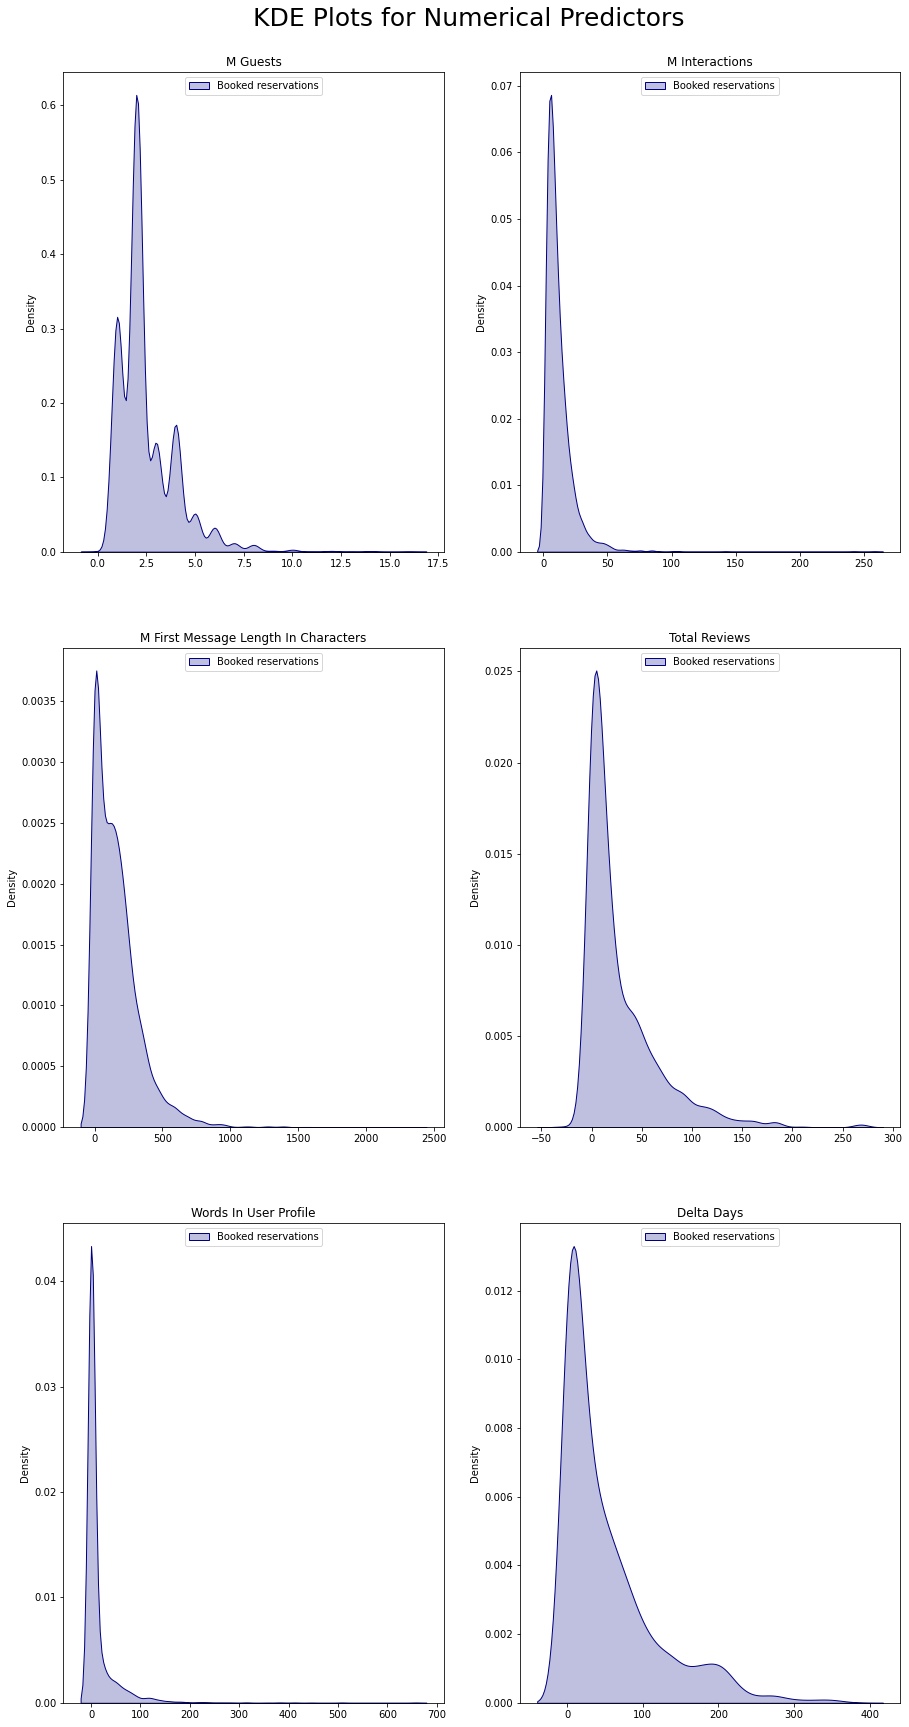

In [11]:
kde_cols = kde_data_instant_book_df3.iloc[:,:6].columns.to_list()
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15,30))

for col, ax in zip(kde_cols[:8], axs.flatten()):
    
    booked = kde_data_instant_book_df3[kde_data_instant_book_df3.ts_booking_at == 1]
    unbooked = kde_data_instant_book_df3[kde_data_instant_book_df3.ts_booking_at == 0]

    sbn.kdeplot(booked[col], fill=True, bw_method=0.2, color='#000080', label='Booked reservations', ax=ax)
    sbn.kdeplot(unbooked[col], fill=True, bw_method=0.2, color='#FF0000', label='Not booked reservations', ax=ax)
    ax.set_xlabel('')
    ax.set_title(col.replace('_', ' ').title())
#     ax.set_title(col.replace('M', '').title())
    _ = ax.legend(loc='upper center')
    
plt.suptitle("KDE Plots for Numerical Predictors",y=0.91, fontsize=25)

Text(0.5, 0.91, 'KDE Plots for Numerical Predictors')

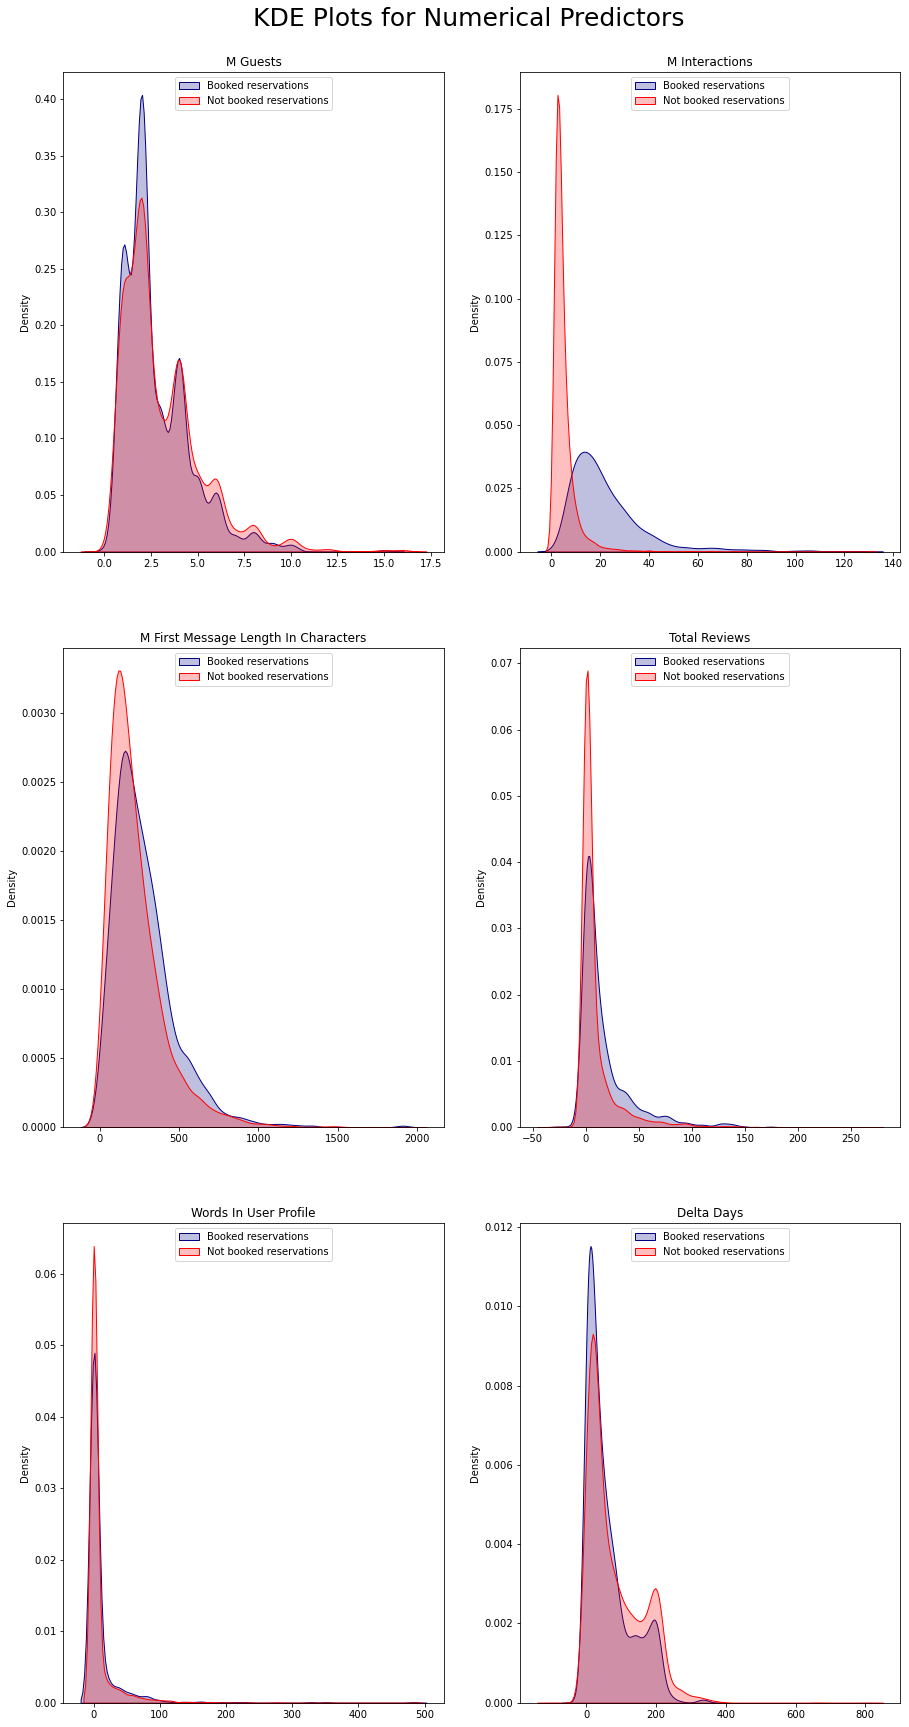

In [12]:
kde_cols = kde_data_contact_me.iloc[:,:6].columns.to_list()
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15,30))

for col, ax in zip(kde_cols[:8], axs.flatten()):
    
    booked = kde_data_contact_me[kde_data_contact_me.ts_booking_at == 1]
    unbooked = kde_data_contact_me[kde_data_contact_me.ts_booking_at == 0]

    sbn.kdeplot(booked[col], fill=True, bw_method=0.2, color='#000080', label='Booked reservations', ax=ax)
    sbn.kdeplot(unbooked[col], fill=True, bw_method=0.2, color='#FF0000', label='Not booked reservations', ax=ax)
    ax.set_xlabel('')
    ax.set_title(col.replace('_', ' ').title())
#     ax.set_title(col.replace('M', '').title())
    _ = ax.legend(loc='upper center')
    
plt.suptitle("KDE Plots for Numerical Predictors",y=0.91, fontsize=25)

In [13]:
cat_data = contact_me_df3[['guest_user_stage_first', 'room_type', 'listing_neighborhood','country', 'booked']]
cat_cols = cat_data.iloc[:,:4].columns.to_list()





# group_data = cat_data.groupby([col,'booked']).size().unstack()
# group_data.columns = ['Unbooked', 'Booked']
# group_data.plot.bar(stacked=True, color=['#619CFF', '#F8766D'])

In [14]:
# group_data

NameError: name 'group_data' is not defined

Text(0.5, 0.91, 'Stacked Barcharts for Categorical Predictors')

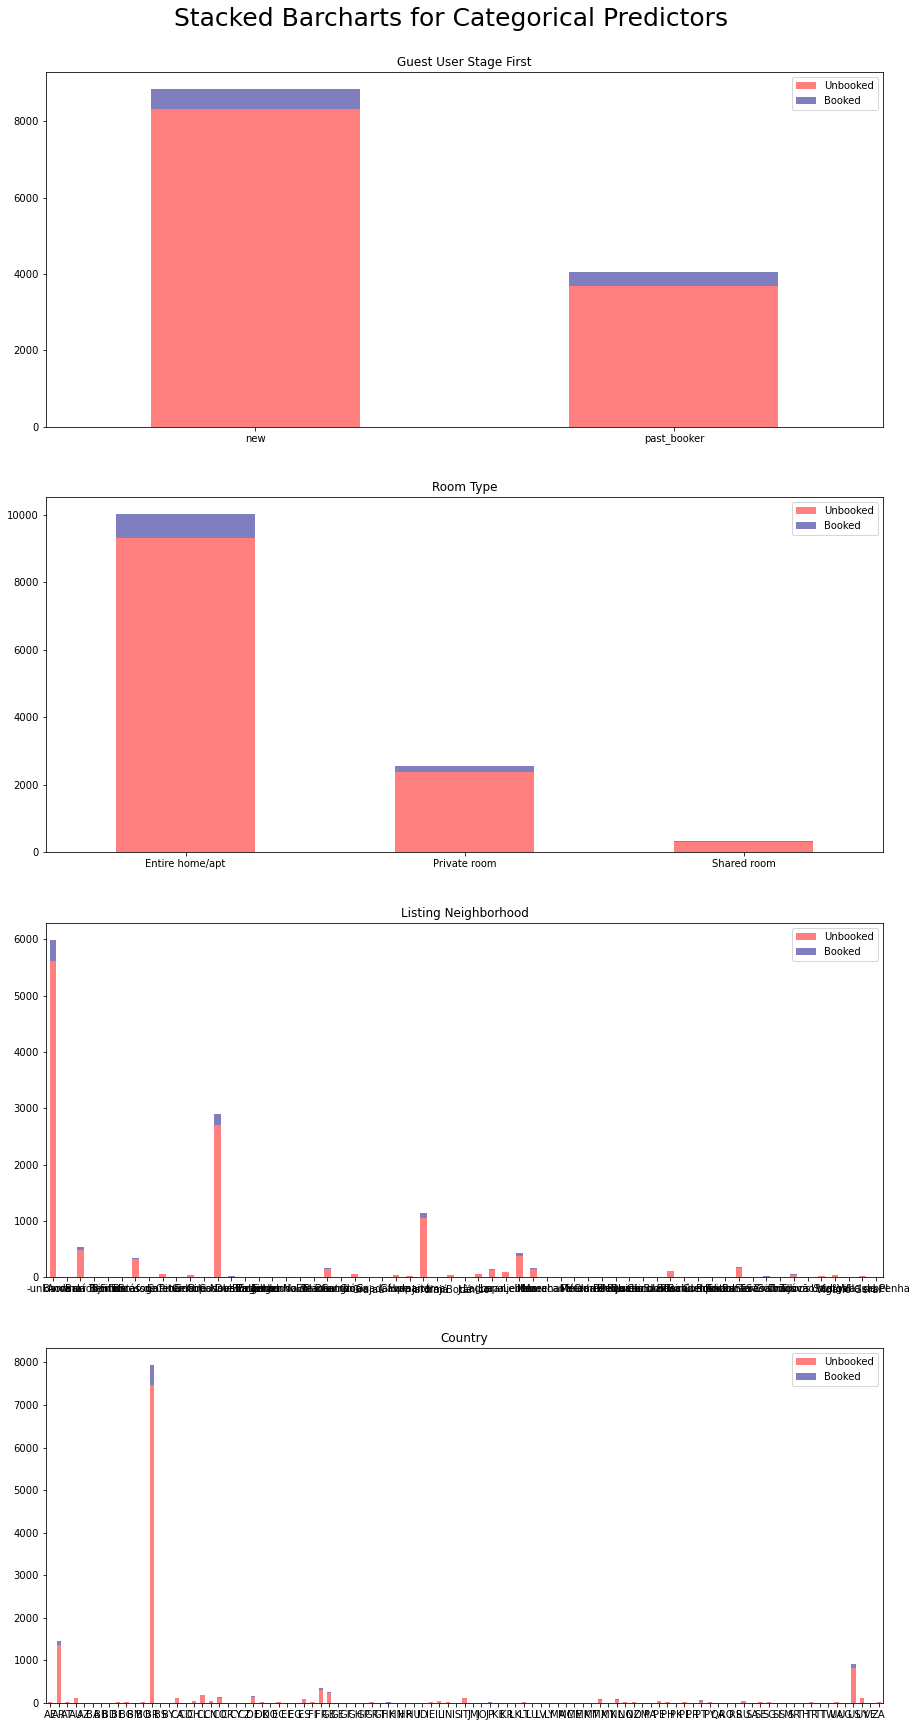

In [15]:

fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(15,30))

# date_format = mdates.DateFormatter('%B-%d')

for col, ax in zip(cat_cols[:4], axs.flatten()):
    group_data = cat_data.groupby([col,'booked']).size().unstack()
    group_data.columns = ['Unbooked', 'Booked']
    group_data.plot.bar(stacked=True, ax=ax, color=['#FF0000','#000080' ], alpha = 0.5)
    if col == 'signup_date':
        ax.xaxis.set_major_formatter(date_format)
        plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right', rotation_mode="anchor")
    else:
        ax.tick_params(labelrotation=0)
    ax.set_xlabel("")
    ax.set_title(col.replace('_', ' ').title())
    _ = ax.legend(loc='best')

plt.suptitle("Stacked Barcharts for Categorical Predictors",y=0.91, fontsize=25) 

In [16]:
combined_df3.head()

,id_guest_anon,id_host_anon,id_listing_anon,ts_interaction_first,ts_reply_at_first,ts_accepted_at_first,ts_booking_at,ds_checkin_first,ds_checkout_first,m_guests,...,guest_user_stage_first,room_type,listing_neighborhood,total_reviews,id_user_anon,country,words_in_user_profile,booked,date_interaction_first,delta_days
0,da8656a1-51af-4f38-b1c4-94be1f585157,5426897d-960d-4013-9e38-606ae746793c,a408a8b2-0d44-4513-a611-3736d0409bb2,2016-04-21 02:55:53,2016-04-21 03:15:00.0,2016-04-21 03:15:00.0,1,2016-08-02,2016-08-06,4.0,...,past_booker,Entire home/apt,Copacabana,9.0,da8656a1-51af-4f38-b1c4-94be1f585157,CL,0,True,2016-04-21,103
1,87b4ac3b-3558-4b20-afb0-d5e487eb1b99,5426897d-960d-4013-9e38-606ae746793c,a408a8b2-0d44-4513-a611-3736d0409bb2,2016-05-16 01:44:04,2016-05-16 01:42:54.0,2016-05-16 01:42:54.0,0,2016-07-11,2016-07-25,2.0,...,past_booker,Entire home/apt,Copacabana,9.0,87b4ac3b-3558-4b20-afb0-d5e487eb1b99,UY,39,False,2016-05-16,56
2,8590d6f1-8bc9-4e8b-bdfb-de78f69fcf37,f30417c5-6df4-45ac-bfc2-6ad1cce398ab,e387c705-0aeb-464c-9375-ece63be6f006,2016-02-16 22:14:01,2016-02-16 23:37:36.0,NaN,0,2016-08-11,2016-08-22,5.0,...,past_booker,Entire home/apt,Copacabana,0.0,8590d6f1-8bc9-4e8b-bdfb-de78f69fcf37,FR,0,False,2016-02-16,177
3,ebcd83ba-bda1-47eb-9680-2dd04ccf3988,13cbf50a-3272-45d4-9866-a06b6ea1b99a,d1eb1960-938f-4305-a353-51e224414dd4,2016-01-27 23:33:38,2016-01-28 02:12:47.0,NaN,0,2016-03-14,2016-03-23,1.0,...,new,Private room,Vidigal,49.0,ebcd83ba-bda1-47eb-9680-2dd04ccf3988,AR,0,False,2016-01-27,47
4,3b6d161c-0451-4e71-9896-026e2503dc38,13cbf50a-3272-45d4-9866-a06b6ea1b99a,d1eb1960-938f-4305-a353-51e224414dd4,2016-05-23 12:37:44,2016-05-23 13:12:10.0,NaN,0,2016-06-11,2016-06-17,1.0,...,past_booker,Private room,Vidigal,49.0,3b6d161c-0451-4e71-9896-026e2503dc38,IT,26,False,2016-05-23,19


In [17]:
combined_df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27979 entries, 0 to 27978
Data columns (total 23 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   id_guest_anon                         27979 non-null  object        
 1   id_host_anon                          27979 non-null  object        
 2   id_listing_anon                       27979 non-null  object        
 3   ts_interaction_first                  27979 non-null  datetime64[ns]
 4   ts_reply_at_first                     25935 non-null  object        
 5   ts_accepted_at_first                  16454 non-null  object        
 6   ts_booking_at                         27979 non-null  int64         
 7   ds_checkin_first                      27979 non-null  datetime64[ns]
 8   ds_checkout_first                     27979 non-null  object        
 9   m_guests                              27979 non-null  float64       
 10

In [18]:
combined_df3.ts_reply_at_first.value_counts()

2016-02-20 13:27:04.0    2
2016-02-03 17:52:02.0    2
2016-06-12 16:49:40.0    2
2016-05-01 21:56:18.0    2
2016-02-24 18:09:21.0    2
                        ..
2016-01-11 21:14:33.0    1
2016-03-25 12:26:22.0    1
2016-01-05 13:08:18.0    1
2016-05-08 21:14:24.0    1
2016-05-12 16:54:50.0    1
Name: ts_reply_at_first, Length: 25834, dtype: int64

In [19]:
combined_df3.ts_reply_at_first.isnull().sum()

2044

In [20]:
df4 = combined_df3.copy()

In [21]:
df4.loc[df4['ts_reply_at_first'].isnull(),'ts_reply_at_first'] = df4['ts_interaction_first']

In [22]:
df4['ts_reply_at_first'] = pd.to_datetime(df4['ts_reply_at_first'],infer_datetime_format=True)
# combined_df3['ts_interaction_first'] = pd.to_datetime(combined_df3['ts_interaction_first'],infer_datetime_format=True)

In [23]:
df4.ts_reply_at_first.value_counts()

2016-03-15 22:29:58    2
2016-01-18 00:17:13    2
2016-04-21 16:19:35    2
2016-02-11 01:21:07    2
2016-04-14 16:23:23    2
                      ..
2016-05-23 22:04:29    1
2016-03-26 14:02:11    1
2016-02-02 01:43:48    1
2016-03-16 23:43:03    1
2016-01-04 02:30:25    1
Name: ts_reply_at_first, Length: 27856, dtype: int64

In [24]:
combined_df3.ts_reply_at_first.isnull().sum()

2044

In [25]:
df4.ts_reply_at_first.isnull().sum()

0

In [26]:
df4['response_time'] = df4['ts_reply_at_first']-df4['ts_interaction_first']

In [27]:
df4.head()

,id_guest_anon,id_host_anon,id_listing_anon,ts_interaction_first,ts_reply_at_first,ts_accepted_at_first,ts_booking_at,ds_checkin_first,ds_checkout_first,m_guests,...,room_type,listing_neighborhood,total_reviews,id_user_anon,country,words_in_user_profile,booked,date_interaction_first,delta_days,response_time
0,da8656a1-51af-4f38-b1c4-94be1f585157,5426897d-960d-4013-9e38-606ae746793c,a408a8b2-0d44-4513-a611-3736d0409bb2,2016-04-21 02:55:53,2016-04-21 03:15:00,2016-04-21 03:15:00.0,1,2016-08-02,2016-08-06,4.0,...,Entire home/apt,Copacabana,9.0,da8656a1-51af-4f38-b1c4-94be1f585157,CL,0,True,2016-04-21,103,0 days 00:19:07
1,87b4ac3b-3558-4b20-afb0-d5e487eb1b99,5426897d-960d-4013-9e38-606ae746793c,a408a8b2-0d44-4513-a611-3736d0409bb2,2016-05-16 01:44:04,2016-05-16 01:42:54,2016-05-16 01:42:54.0,0,2016-07-11,2016-07-25,2.0,...,Entire home/apt,Copacabana,9.0,87b4ac3b-3558-4b20-afb0-d5e487eb1b99,UY,39,False,2016-05-16,56,-1 days +23:58:50
2,8590d6f1-8bc9-4e8b-bdfb-de78f69fcf37,f30417c5-6df4-45ac-bfc2-6ad1cce398ab,e387c705-0aeb-464c-9375-ece63be6f006,2016-02-16 22:14:01,2016-02-16 23:37:36,NaN,0,2016-08-11,2016-08-22,5.0,...,Entire home/apt,Copacabana,0.0,8590d6f1-8bc9-4e8b-bdfb-de78f69fcf37,FR,0,False,2016-02-16,177,0 days 01:23:35
3,ebcd83ba-bda1-47eb-9680-2dd04ccf3988,13cbf50a-3272-45d4-9866-a06b6ea1b99a,d1eb1960-938f-4305-a353-51e224414dd4,2016-01-27 23:33:38,2016-01-28 02:12:47,NaN,0,2016-03-14,2016-03-23,1.0,...,Private room,Vidigal,49.0,ebcd83ba-bda1-47eb-9680-2dd04ccf3988,AR,0,False,2016-01-27,47,0 days 02:39:09
4,3b6d161c-0451-4e71-9896-026e2503dc38,13cbf50a-3272-45d4-9866-a06b6ea1b99a,d1eb1960-938f-4305-a353-51e224414dd4,2016-05-23 12:37:44,2016-05-23 13:12:10,NaN,0,2016-06-11,2016-06-17,1.0,...,Private room,Vidigal,49.0,3b6d161c-0451-4e71-9896-026e2503dc38,IT,26,False,2016-05-23,19,0 days 00:34:26


In [28]:
df4['response_time'].value_counts(sort = True)

0 days 00:00:00      5651
0 days 00:00:01      1754
-1 days +23:58:50     203
0 days 00:00:02        39
-1 days +23:58:51      19
                     ... 
0 days 01:53:42         1
0 days 18:00:40         1
1 days 05:00:13         1
0 days 05:46:34         1
1 days 00:25:32         1
Name: response_time, Length: 13919, dtype: int64

In [29]:
lst1 = df4[['response_time','ts_booking_at']]

AttributeError: 'AxesSubplot' object has no attribute 'flatten'

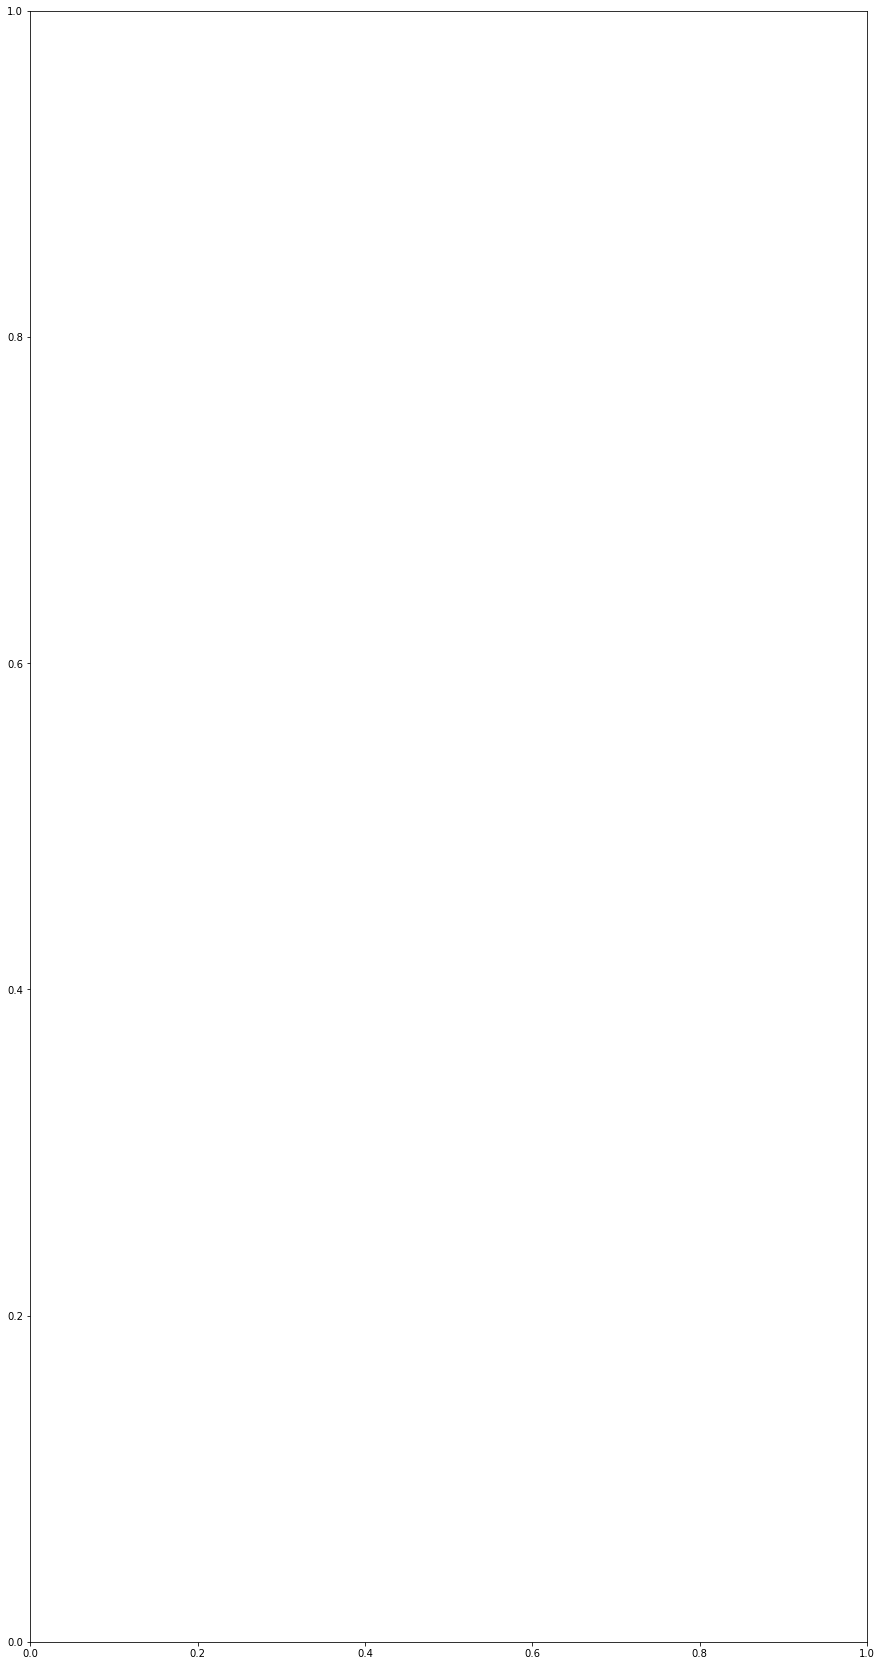

In [30]:
kde_cols = kde_data_book_it_df3.iloc[:,:1].columns.to_list()
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(15,30))

for col, ax in zip(kde_cols[:1], axs.flatten()):
    
    booked = df4[df4.ts_booking_at == 1]
    unbooked = df4[df4.ts_booking_at == 0]

    sbn.kdeplot(booked[col], fill=True, bw_method=0.2, color='#000080', label='Booked reservations', ax=ax)
    sbn.kdeplot(unbooked[col], fill=True, bw_method=0.2, color='#FF0000', label='Not booked reservations', ax=ax)
    ax.set_xlabel('')
    ax.set_title(col.replace('_', ' ').title())
#     ax.set_title(col.replace('M', '').title())
    _ = ax.legend(loc='upper center')
    
plt.suptitle("KDE Plots for Numerical Predictors",y=0.91, fontsize=25)

In [38]:
df4.head()

,id_guest_anon,id_host_anon,id_listing_anon,ts_interaction_first,ts_reply_at_first,ts_accepted_at_first,ts_booking_at,ds_checkin_first,ds_checkout_first,m_guests,...,room_type,listing_neighborhood,total_reviews,id_user_anon,country,words_in_user_profile,booked,date_interaction_first,delta_days,response_time
0,da8656a1-51af-4f38-b1c4-94be1f585157,5426897d-960d-4013-9e38-606ae746793c,a408a8b2-0d44-4513-a611-3736d0409bb2,2016-04-21 02:55:53,2016-04-21 03:15:00,2016-04-21 03:15:00.0,1,2016-08-02,2016-08-06,4.0,...,Entire home/apt,Copacabana,9.0,da8656a1-51af-4f38-b1c4-94be1f585157,CL,0,True,2016-04-21,103,0 days 00:19:07
1,87b4ac3b-3558-4b20-afb0-d5e487eb1b99,5426897d-960d-4013-9e38-606ae746793c,a408a8b2-0d44-4513-a611-3736d0409bb2,2016-05-16 01:44:04,2016-05-16 01:42:54,2016-05-16 01:42:54.0,0,2016-07-11,2016-07-25,2.0,...,Entire home/apt,Copacabana,9.0,87b4ac3b-3558-4b20-afb0-d5e487eb1b99,UY,39,False,2016-05-16,56,-1 days +23:58:50
2,8590d6f1-8bc9-4e8b-bdfb-de78f69fcf37,f30417c5-6df4-45ac-bfc2-6ad1cce398ab,e387c705-0aeb-464c-9375-ece63be6f006,2016-02-16 22:14:01,2016-02-16 23:37:36,NaN,0,2016-08-11,2016-08-22,5.0,...,Entire home/apt,Copacabana,0.0,8590d6f1-8bc9-4e8b-bdfb-de78f69fcf37,FR,0,False,2016-02-16,177,0 days 01:23:35
3,ebcd83ba-bda1-47eb-9680-2dd04ccf3988,13cbf50a-3272-45d4-9866-a06b6ea1b99a,d1eb1960-938f-4305-a353-51e224414dd4,2016-01-27 23:33:38,2016-01-28 02:12:47,NaN,0,2016-03-14,2016-03-23,1.0,...,Private room,Vidigal,49.0,ebcd83ba-bda1-47eb-9680-2dd04ccf3988,AR,0,False,2016-01-27,47,0 days 02:39:09
4,3b6d161c-0451-4e71-9896-026e2503dc38,13cbf50a-3272-45d4-9866-a06b6ea1b99a,d1eb1960-938f-4305-a353-51e224414dd4,2016-05-23 12:37:44,2016-05-23 13:12:10,NaN,0,2016-06-11,2016-06-17,1.0,...,Private room,Vidigal,49.0,3b6d161c-0451-4e71-9896-026e2503dc38,IT,26,False,2016-05-23,19,0 days 00:34:26


In [117]:
df5 = df4.copy()

In [122]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27979 entries, 0 to 27978
Data columns (total 24 columns):
 #   Column                                Non-Null Count  Dtype          
---  ------                                --------------  -----          
 0   id_guest_anon                         27979 non-null  object         
 1   id_host_anon                          27979 non-null  object         
 2   id_listing_anon                       27979 non-null  object         
 3   ts_interaction_first                  27979 non-null  datetime64[ns] 
 4   ts_reply_at_first                     27979 non-null  datetime64[ns] 
 5   ts_accepted_at_first                  16454 non-null  object         
 6   ts_booking_at                         27979 non-null  int64          
 7   ds_checkin_first                      27979 non-null  datetime64[ns] 
 8   ds_checkout_first                     27979 non-null  object         
 9   m_guests                              27979 non-null  float64

In [125]:
# df5['response_time_hours']= df5.response_time.total_seconds()/ 3600

df5['response_time_hours'] = df5['response_time'] / np.timedelta64(1, 'h')

# dateTimeDifference = df4['ts_reply_at_first']-df4['ts_interaction_first']
# df5['response_time_hours'] = dateTimeDifference.total_seconds() / 3600

In [127]:
df5.response_time_hours.describe()

count    27979.000000
mean        13.664238
std        135.631865
min         -0.019444
25%          0.000278
50%          0.511389
75%          6.086250
max       9842.931667
Name: response_time_hours, dtype: float64

In [40]:
df5.columns

Index(['id_guest_anon', 'id_host_anon', 'id_listing_anon',
       'ts_interaction_first', 'ts_reply_at_first', 'ts_accepted_at_first',
       'ts_booking_at', 'ds_checkin_first', 'ds_checkout_first', 'm_guests',
       'm_interactions', 'm_first_message_length_in_characters',
       'contact_channel_first', 'guest_user_stage_first', 'room_type',
       'listing_neighborhood', 'total_reviews', 'id_user_anon', 'country',
       'words_in_user_profile', 'booked', 'date_interaction_first',
       'delta_days', 'response_time'],
      dtype='object')

In [41]:
col_list = ['id_guest_anon', 'id_host_anon', 'id_listing_anon',
       'ts_interaction_first', 'ts_reply_at_first', 'ts_accepted_at_first','ds_checkin_first', 'ds_checkout_first','id_user_anon',
            'country','booked', 'date_interaction_first', 'response_time','listing_neighborhood']

In [42]:
# df5.info()
df5.drop(col_list, axis = 1,inplace= True)

In [43]:
df5.response_time.describe()

AttributeError: 'DataFrame' object has no attribute 'response_time'

In [44]:
d2 =  {
    'past_booker':1
    ,'new':0}
df5['guest_user_stage_first'].replace(d2, inplace= True)

In [45]:
df5

,ts_booking_at,m_guests,m_interactions,m_first_message_length_in_characters,contact_channel_first,guest_user_stage_first,room_type,total_reviews,words_in_user_profile,delta_days
0,1,4.0,30,31.0,book_it,1,Entire home/apt,9.0,0,103
1,0,2.0,6,0.0,contact_me,1,Entire home/apt,9.0,39,56
2,0,5.0,2,312.0,contact_me,1,Entire home/apt,0.0,0,177
3,0,1.0,3,164.0,contact_me,0,Private room,49.0,0,47
4,0,1.0,14,1478.0,contact_me,1,Private room,49.0,26,19
...,...,...,...,...,...,...,...,...,...,...
27974,1,4.0,3,146.0,instant_book,0,Entire home/apt,0.0,0,120
27975,0,5.0,4,89.0,contact_me,1,Entire home/apt,0.0,5,65
27976,0,3.0,3,182.0,book_it,0,Entire home/apt,1.0,0,21
27977,1,4.0,64,167.0,instant_book,0,Entire home/apt,0.0,12,70


In [46]:
df6 = pd.get_dummies(df5, prefix=['A'], columns=['room_type'])

In [47]:
df6

,ts_booking_at,m_guests,m_interactions,m_first_message_length_in_characters,contact_channel_first,guest_user_stage_first,total_reviews,words_in_user_profile,delta_days,A_Entire home/apt,A_Private room,A_Shared room
0,1,4.0,30,31.0,book_it,1,9.0,0,103,1,0,0
1,0,2.0,6,0.0,contact_me,1,9.0,39,56,1,0,0
2,0,5.0,2,312.0,contact_me,1,0.0,0,177,1,0,0
3,0,1.0,3,164.0,contact_me,0,49.0,0,47,0,1,0
4,0,1.0,14,1478.0,contact_me,1,49.0,26,19,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
27974,1,4.0,3,146.0,instant_book,0,0.0,0,120,1,0,0
27975,0,5.0,4,89.0,contact_me,1,0.0,5,65,1,0,0
27976,0,3.0,3,182.0,book_it,0,1.0,0,21,1,0,0
27977,1,4.0,64,167.0,instant_book,0,0.0,12,70,1,0,0


In [48]:
df7 = pd.get_dummies(df6, prefix=['A'], columns=['contact_channel_first'])

In [49]:
df7

,ts_booking_at,m_guests,m_interactions,m_first_message_length_in_characters,guest_user_stage_first,total_reviews,words_in_user_profile,delta_days,A_Entire home/apt,A_Private room,A_Shared room,A_book_it,A_contact_me,A_instant_book
0,1,4.0,30,31.0,1,9.0,0,103,1,0,0,1,0,0
1,0,2.0,6,0.0,1,9.0,39,56,1,0,0,0,1,0
2,0,5.0,2,312.0,1,0.0,0,177,1,0,0,0,1,0
3,0,1.0,3,164.0,0,49.0,0,47,0,1,0,0,1,0
4,0,1.0,14,1478.0,1,49.0,26,19,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27974,1,4.0,3,146.0,0,0.0,0,120,1,0,0,0,0,1
27975,0,5.0,4,89.0,1,0.0,5,65,1,0,0,0,1,0
27976,0,3.0,3,182.0,0,1.0,0,21,1,0,0,1,0,0
27977,1,4.0,64,167.0,0,0.0,12,70,1,0,0,0,0,1


In [50]:
y = df7.pop('ts_booking_at')
X = df7

In [52]:
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.15, random_state=1, stratify = y)
X_train2, X_test, y_train2, y_test = train_test_split(X_train.copy(), y_train.copy(), test_size=0.10, random_state=1)

In [81]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score, make_scorer, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV,SGDClassifier, Lasso
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor, RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error, accuracy_score, f1_score,accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.svm import SVC

from sklearn import svm
from sklearn.metrics import accuracy_score, precision_score, recall_score
import pickle

from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import shuffle

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

In [82]:
gradient_boosting_grid = {'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5]
                         ,'max_depth': [2, 4, 8]
                         ,'subsample': [0.25, 0.5, 0.75, 1.0]
                         ,'min_samples_leaf': [1, 2, 4]
                         ,'max_features': ['sqrt', 'log2', None]
                         ,'n_estimators': [5,10,25,50,100,200]}

random_forest_grid = {'max_depth': [2, 4, 8]
                     ,'max_features': ['sqrt', 'log2', None]
                     ,'min_samples_leaf': [1, 2, 4]
                     ,'min_samples_split': [2, 4]
                     ,'bootstrap': [True, False]
                     ,'class_weight': ['balanced']

                     ,'n_estimators': [5,10,25,50,100,200]}

logistic_regression_grid = {'Cs':[2,5,10, 25, 100, 200]
                       ,'cv':[4]
                       ,'solver':['liblinear']#'lbfgs',
#                        ,'max_iter' : [50]
                       ,'class_weight':['balanced']
                       ,'penalty':['l1'] #, 'l2', 'elasticnet'
                            
                         }
logistic2_regression_grid = {'C':[0.0305,0.03055, 0.03060, 0.03065, 0.0307, 0.03075, 0.03077]
#                        ,'cv':[4]
                       ,'solver':['liblinear']#'lbfgs',
#                        ,'max_iter' : [50]
                       ,'class_weight':['balanced']
                       ,'penalty':['l1']} #, 'l2', 'elasticnet'
    
svm_grid = {'C':[0.5, 1, 2]

                       ,'kernel':['rbf', 'liblinear']}

ada_grid = {'base_estimator': [DecisionTreeClassifier(class_weight='balanced')], \
                  'n_estimators': [100, 250], \
                  'learning_rate': [0.1, 0.25]}


sgd_grid = {'loss': ['hinge', 'log', 'modified_huber'], \
                      'alpha': [0.001, 0.01], \
                      'penalty': ['l1'], \
                      'max_iter': [5, 10, 25], \
                      'class_weight': ['balanced']}

In [83]:
logistic_randomsearch = RandomizedSearchCV(LogisticRegressionCV()
                                              ,logistic_regression_grid
                                              ,n_jobs=-1
                                              ,verbose=False
                                              ,scoring='roc_auc')

logistic2_randomsearch = RandomizedSearchCV(LogisticRegression()
                                              ,logistic2_regression_grid
                                              ,n_jobs=-1
                                              ,verbose=False
                                              ,scoring='roc_auc')

logistic2_gridsearch = GridSearchCV(LogisticRegression()
                                          ,logistic2_regression_grid
                                          ,n_jobs=-1
                                          ,verbose=False
                                          ,scoring='roc_auc')



svm_randomsearch = RandomizedSearchCV(SVC(gamma = 'auto')
                                              ,svm_grid
                                              ,n_jobs=-1
                                              ,verbose=False
                                              ,scoring='roc_auc')

gradient_randomsearch = RandomizedSearchCV(GradientBoostingClassifier()
                                          ,gradient_boosting_grid
                                          ,n_jobs=-1
                                          ,verbose=False
                                          ,scoring='roc_auc')

random_foreset_randomsearch = RandomizedSearchCV(RandomForestClassifier()
                                                ,random_forest_grid
                                                ,n_jobs=-1
                                                ,verbose=False
                                                ,scoring='roc_auc')

ada_randomsearch = RandomizedSearchCV(AdaBoostClassifier()
                                                ,ada_grid
                                                ,n_jobs=-1
                                                ,verbose=False
                                                ,scoring='roc_auc')

SGD_randomsearch = RandomizedSearchCV(SGDClassifier()
                                                ,sgd_grid
                                                ,n_jobs=-1
                                                ,verbose=False
                                                ,scoring='roc_auc')

In [84]:


logistic2_randomsearch.fit(X_train, y_train)
print(f"Best logistic Parameters: {logistic2_randomsearch.best_params_}")
print(f"Best logistic Model: {logistic2_randomsearch.best_estimator_}")
print(f"Best logistic Score: {logistic2_randomsearch.best_score_:.4f}")

logistic2_gridsearch.fit(X_train, y_train)
print(f"Best GRID logistic Parameters: {logistic2_gridsearch.best_params_}")
print(f"Best GRID logistic Model: {logistic2_gridsearch.best_estimator_}")
print(f"Best GRID logistic Score: {logistic2_gridsearch.best_score_:.4f}")




# svm_randomsearch.fit(X_train, y_train)
# print(f"Best svm Parameters: {svm_randomsearch.best_params_}")
# print(f"Best svm Model: {svm_randomsearch.best_estimator_}")
# print(f"Best svm Score: {svm_randomsearch.best_score_:.4f}")

gradient_randomsearch.fit(X_train, y_train)
print(f"Best Gradient Parameters: {gradient_randomsearch.best_params_}")
print(f"Best Gradient Model: {gradient_randomsearch.best_estimator_}")
print(f"Best Gradient Score: {gradient_randomsearch.best_score_:.4f}")

random_foreset_randomsearch.fit(X_train, y_train)
print(f"Best Random Forest Parameters: {random_foreset_randomsearch.best_params_}")
print(f"Best Random Forest Model: {random_foreset_randomsearch.best_estimator_}")
print(f"Best Random Forest Score: {random_foreset_randomsearch.best_score_:.4f}")

/Users/cp/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:282: UserWarning: The total space of parameters 7 is smaller than n_iter=10. Running 7 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


Best logistic Parameters: {'solver': 'liblinear', 'penalty': 'l1', 'class_weight': 'balanced', 'C': 0.03077}
Best logistic Model: LogisticRegression(C=0.03077, class_weight='balanced', penalty='l1',
                   solver='liblinear')
Best logistic Score: 0.9716
Best GRID logistic Parameters: {'C': 0.03077, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}
Best GRID logistic Model: LogisticRegression(C=0.03077, class_weight='balanced', penalty='l1',
                   solver='liblinear')
Best GRID logistic Score: 0.9716
Best Gradient Parameters: {'subsample': 1.0, 'n_estimators': 100, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 2, 'learning_rate': 0.3}
Best Gradient Model: GradientBoostingClassifier(learning_rate=0.3, max_depth=2, max_features='sqrt')
Best Gradient Score: 0.9797
Best Random Forest Parameters: {'n_estimators': 100, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 8, 'class_weight': 'balanced', 'bootst

In [90]:
logistic2_best_model = logistic2_randomsearch.best_estimator_
logistic2_y_hats = logistic2_best_model.predict(X_test)
print(f"logistic2 precision Score = {precision_score(y_test, logistic2_y_hats):.4f}")

logisticGrid_best_model = logistic2_gridsearch.best_estimator_
logisticGrid_y_hats = logisticGrid_best_model.predict(X_test)
print(f"logistic GRID precision Score = {precision_score(y_test, logisticGrid_y_hats):.4f}")

# svm_best_model = svm_randomsearch.best_estimator_
# svm_y_hats = svm_best_model.predict(X_test)
# print(f"SVM ROC Score = {roc_auc_score(y_test, svm_y_hats):.4f}")

gradient_best_model = gradient_randomsearch.best_estimator_
gy_hats = gradient_best_model.predict(X_test)
print(f"Gradient precision Score = {precision_score(y_test, gy_hats):.4f}")

random_forest_best_model = random_foreset_randomsearch.best_estimator_
ry_hats = random_forest_best_model.predict(X_test)
print(f"Random Forest precision Score = {precision_score(y_test, ry_hats):.4f}")

logistic2 precision Score = 0.9050
logistic GRID precision Score = 0.9050
Gradient precision Score = 0.9169
Random Forest precision Score = 0.9044


In [91]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, logistic_y_hats))


              precision    recall  f1-score   support

           0       0.91      0.95      0.93      1397
           1       0.93      0.87      0.90       982

    accuracy                           0.92      2379
   macro avg       0.92      0.91      0.91      2379
weighted avg       0.92      0.92      0.92      2379



In [92]:
print(classification_report(y_test, gy_hats))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1397
           1       0.92      0.91      0.91       982

    accuracy                           0.93      2379
   macro avg       0.93      0.93      0.93      2379
weighted avg       0.93      0.93      0.93      2379



In [93]:
print(classification_report(y_test, ry_hats))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94      1397
           1       0.90      0.94      0.92       982

    accuracy                           0.94      2379
   macro avg       0.93      0.94      0.93      2379
weighted avg       0.94      0.94      0.94      2379



In [96]:
logistic_coefs = logisticGrid_best_model.coef_
log_coef_reshape = logistic_coefs.reshape(13, -1)

In [99]:
logistic_coefs.shape
logistic_coefs


array([[-6.61570892e-02,  2.05189154e-01, -1.65636842e-04,
         4.04653354e-02,  1.81415572e-02,  2.31814745e-04,
        -6.28651264e-03, -5.52163401e-02,  0.00000000e+00,
         0.00000000e+00, -2.60463180e-01, -3.14911091e+00,
         4.87266344e+00]])

In [100]:
lst_coefs = []
for name, coef in zip(X.columns[1:], logisticGrid_best_model.coef_[0]):
#     if logisticGrid_best_model.coef_[0] !=0.0000:
    lst_coefs.append((name, coef))
    print("{0}: {1:0.4f}".format(name, coef))

m_interactions: -0.0662
m_first_message_length_in_characters: 0.2052
guest_user_stage_first: -0.0002
total_reviews: 0.0405
words_in_user_profile: 0.0181
delta_days: 0.0002
A_Entire home/apt: -0.0063
A_Private room: -0.0552
A_Shared room: 0.0000
A_book_it: 0.0000
A_contact_me: -0.2605
A_instant_book: -3.1491


In [101]:
lst_coefs
vif_dict = {}
for i in lst_coefs:
    if i[1] != 0:
        vif_dict[i[0]] = i[1]

vif_dict   

{'m_interactions': -0.06615708921150286,
 'm_first_message_length_in_characters': 0.20518915433313673,
 'guest_user_stage_first': -0.0001656368415428895,
 'total_reviews': 0.04046533537547325,
 'words_in_user_profile': 0.018141557197292584,
 'delta_days': 0.00023181474454044798,
 'A_Entire home/apt': -0.006286512641238435,
 'A_Private room': -0.05521634009029189,
 'A_contact_me': -0.26046318001836927,
 'A_instant_book': -3.1491109068570196}

In [102]:
vif_df_ordered = pd.DataFrame.from_dict(vif_dict, orient='index')
vif_df_ordered.sort_values(by =0, inplace = True)
vif_df_ordered[1] = vif_df_ordered.index

In [103]:
vif_df_ordered

,0,1
A_instant_book,-3.149111,A_instant_book
A_contact_me,-0.260463,A_contact_me
m_interactions,-0.066157,m_interactions
A_Private room,-0.055216,A_Private room
A_Entire home/apt,-0.006287,A_Entire home/apt
guest_user_stage_first,-0.000166,guest_user_stage_first
delta_days,0.000232,delta_days
words_in_user_profile,0.018142,words_in_user_profile
total_reviews,0.040465,total_reviews
m_first_message_length_in_characters,0.205189,m_first_message_length_in_characters


[]

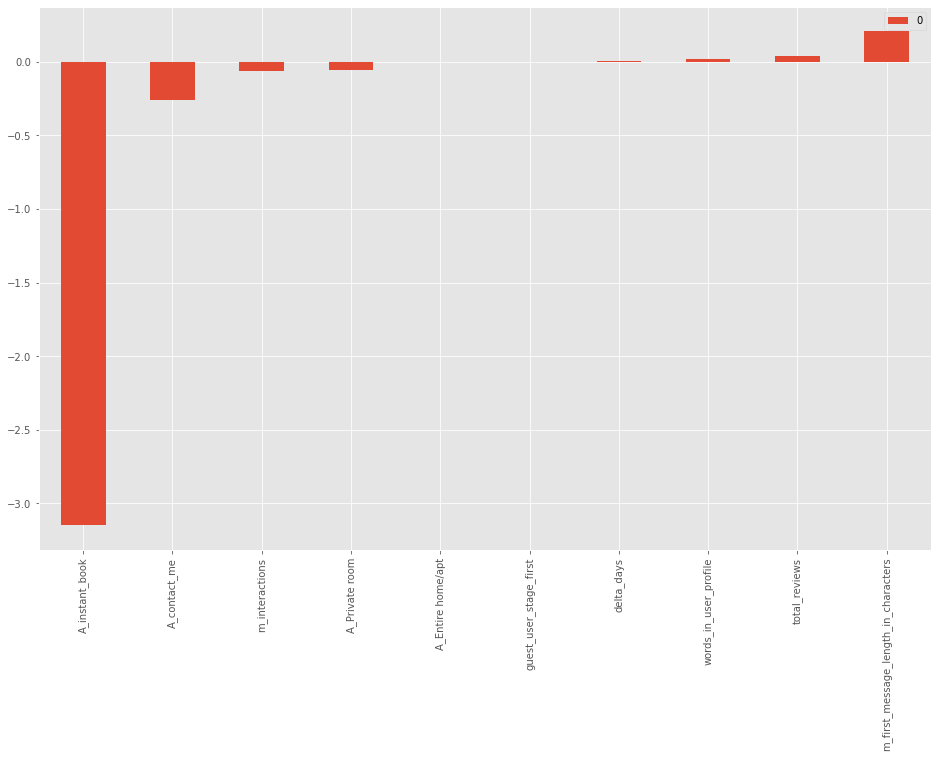

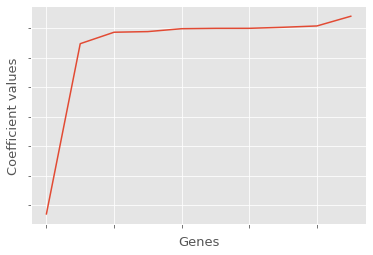

In [104]:
vif_df_ordered.plot.bar(figsize = (16,10))
vif_df_ordered.plot(legend=None)
plt.xlabel("Genes", fontsize = 13)
plt.ylabel("Coefficient values", fontsize = 13)
frame1 = plt.gca()
frame1.axes.xaxis.set_ticklabels([])
frame1.axes.yaxis.set_ticklabels([])
ax.legend().set_visible(False)
plt.plot(lgend = None)

Feature ranking:
1. feature 11 (0.544727)
2. feature 1 (0.226289)
3. feature 10 (0.141814)
4. feature 4 (0.032649)
5. feature 6 (0.024440)
6. feature 2 (0.017706)
7. feature 0 (0.005055)
8. feature 5 (0.003212)
9. feature 3 (0.001671)
10. feature 7 (0.001085)
11. feature 9 (0.000733)
12. feature 8 (0.000618)
13. feature 12 (0.000000)


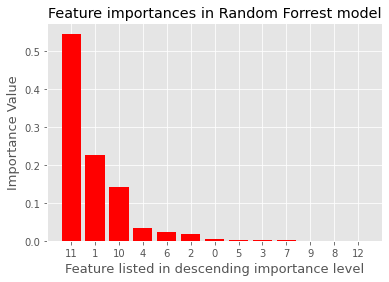

In [107]:
importances = random_forest_best_model.feature_importances_
std = np.std([random_forest_best_model.feature_importances_ for tree in random_forest_best_model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances in Random Forrest model")
plt.bar(range(X_train.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.xlabel("Feature listed in descending importance level", fontsize = 13)
plt.ylabel("Importance Value", fontsize = 13)
plt.savefig("Random_forrest_feature_importance.png", dpi=200)
plt.show()

Feature ranking:
1. feature 12 (0.352781)
2. feature 11 (0.277081)
3. feature 1 (0.217480)
4. feature 4 (0.056694)
5. feature 2 (0.033545)
6. feature 6 (0.030733)
7. feature 3 (0.023613)
8. feature 10 (0.005757)
9. feature 0 (0.000999)
10. feature 5 (0.000766)
11. feature 8 (0.000471)
12. feature 7 (0.000071)
13. feature 9 (0.000009)


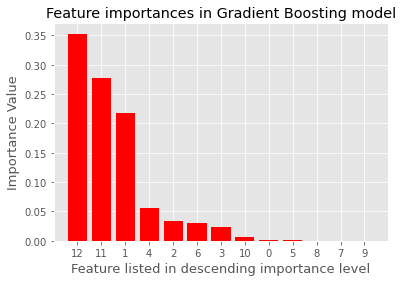

In [106]:
importances = gradient_best_model.feature_importances_
std = np.std([gradient_best_model.feature_importances_ for tree in gradient_best_model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances in Gradient Boosting model")
plt.bar(range(X_train.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.xlabel("Feature listed in descending importance level", fontsize = 13)
plt.ylabel("Importance Value", fontsize = 13)
plt.savefig("gradient_boost_feature_importance.png", dpi=200)
plt.show()

In [108]:
df7

,m_guests,m_interactions,m_first_message_length_in_characters,guest_user_stage_first,total_reviews,words_in_user_profile,delta_days,A_Entire home/apt,A_Private room,A_Shared room,A_book_it,A_contact_me,A_instant_book
0,4.0,30,31.0,1,9.0,0,103,1,0,0,1,0,0
1,2.0,6,0.0,1,9.0,39,56,1,0,0,0,1,0
2,5.0,2,312.0,1,0.0,0,177,1,0,0,0,1,0
3,1.0,3,164.0,0,49.0,0,47,0,1,0,0,1,0
4,1.0,14,1478.0,1,49.0,26,19,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27974,4.0,3,146.0,0,0.0,0,120,1,0,0,0,0,1
27975,5.0,4,89.0,1,0.0,5,65,1,0,0,0,1,0
27976,3.0,3,182.0,0,1.0,0,21,1,0,0,1,0,0
27977,4.0,64,167.0,0,0.0,12,70,1,0,0,0,0,1


In [109]:
y

0        1
1        0
2        0
3        0
4        0
        ..
27974    1
27975    0
27976    0
27977    1
27978    0
Name: ts_booking_at, Length: 27979, dtype: int64

In [111]:
test_df= df7.copy()

In [112]:
test_df.columns

Index(['m_guests', 'm_interactions', 'm_first_message_length_in_characters',
       'guest_user_stage_first', 'total_reviews', 'words_in_user_profile',
       'delta_days', 'A_Entire home/apt', 'A_Private room', 'A_Shared room',
       'A_book_it', 'A_contact_me', 'A_instant_book'],
      dtype='object')

In [114]:
test_drop =['m_guests', 'm_interactions', 'm_first_message_length_in_characters',
       'guest_user_stage_first', 'total_reviews', 'words_in_user_profile',
       'delta_days', 'A_Entire home/apt', 'A_Private room', 'A_Shared room',
       'A_book_it', 'A_contact_me']
test_df.drop(test_drop, axis = 1,inplace= True)

In [115]:
test_df['target'] = y

In [116]:
test_df

,A_instant_book,target
0,0,1
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
27974,1,1
27975,0,0
27976,0,0
27977,1,1


In [129]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27979 entries, 0 to 27978
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   m_guests                              27979 non-null  float64
 1   m_interactions                        27979 non-null  int64  
 2   m_first_message_length_in_characters  27979 non-null  float64
 3   guest_user_stage_first                27979 non-null  int64  
 4   total_reviews                         27979 non-null  float64
 5   words_in_user_profile                 27979 non-null  int64  
 6   delta_days                            27979 non-null  int16  
 7   A_Entire home/apt                     27979 non-null  uint8  
 8   A_Private room                        27979 non-null  uint8  
 9   A_Shared room                         27979 non-null  uint8  
 10  A_book_it                             27979 non-null  uint8  
 11  A_contact_me   